# Курсовой проект по теме «Теория вероятностей и математическая статистика»

## Постановка задачи

### Задача

Требуется провести EDA (разведочный анализ данных) экологических показателей.

### Примерное описание этапов выполнения курсового проекта

1. Обзор данных
2. Выделение групп признаков
3. Обработка выбросов и пропусков в целях повышения качества данных
4. Анализ признаков (без нормализации и с нормализацией данных)

## Решение

### Обзор данных

**Описание датасета**

* **Id** - идентификационный номер
* **Output** - источник измерения экологических показателей
* **District** - территория измерения экологических показателей
* **Total** - объемный показатель
* **D1 - D20** - экологические показатели

#### Подключение библиотек и скриптов

In [352]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from pprint import pprint

#### Пути к директориям и файлам

In [353]:
DATA_ROOT = Path('./data/')

# input
TRAIN_DATASET_PATH = DATA_ROOT / 'down.csv'

#### Загрузка данных

In [354]:
# 'Id': np.int32,, 'Total': np.float
base_df = pd.read_csv(TRAIN_DATASET_PATH,sep=';',decimal=',',index_col=0,\
                      dtype={'Output': np.str_, 'District': np.str_,'Id': np.int32})
train_df = pd.read_csv(TRAIN_DATASET_PATH,sep=';',decimal=',',index_col=0,\
                      dtype={'Output': np.str_, 'District': np.str_,'Id': np.int32})

In [355]:
train_df.head()

,Output,District,Total,D1,D2,D3,D4,D5,D6,D7,...,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20
Id,,,,,,,,,,,,,,,,,,,,,
1,1,002,1332.276,0.0,0.0,7.7,1.60,0.0,14.5,7.46,...,0.000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,6,009,0.390,7.0,392.0,7.5,0.81,NaN,2.3,14.00,...,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN
3,7,009,0.390,6.4,373.0,7.6,0.77,NaN,2.5,14.00,...,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN
4,8,009,0.130,5.6,445.0,7.8,0.28,NaN,9.1,162.00,...,NaN,NaN,NaN,NaN,3.89,NaN,NaN,NaN,NaN,NaN
5,9,009,14.877,6.2,352.0,7.5,0.60,NaN,3.0,14.00,...,0.063,0.0,NaN,10.47,2.51,7.0,NaN,NaN,49.0,41.0


In [356]:
train_df.shape

(528, 23)

In [357]:
train_df.iloc[0]

Output            1
District        002
Total       1332.28
D1                0
D2                0
D3              7.7
D4              1.6
D5                0
D6             14.5
D7             7.46
D8              0.1
D9                0
D10               0
D11               0
D12               0
D13               0
D14               0
D15               0
D16               0
D17               0
D18               0
D19               0
D20               0
Name: 1, dtype: object

In [358]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1 to 528
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Output    528 non-null    object 
 1   District  528 non-null    object 
 2   Total     528 non-null    float64
 3   D1        528 non-null    float64
 4   D2        528 non-null    float64
 5   D3        528 non-null    float64
 6   D4        528 non-null    float64
 7   D5        373 non-null    float64
 8   D6        515 non-null    float64
 9   D7        511 non-null    float64
 10  D8        501 non-null    float64
 11  D9        182 non-null    float64
 12  D10       331 non-null    float64
 13  D11       192 non-null    float64
 14  D12       344 non-null    float64
 15  D13       278 non-null    float64
 16  D14       281 non-null    float64
 17  D15       486 non-null    float64
 18  D16       331 non-null    float64
 19  D17       195 non-null    float64
 20  D18       187 non-null    float6

### Выделение групп признаков

In [359]:
EX_FEATURES = ['Output', 'District', 'Total']
D_FEATURES = base_df.columns.drop(EX_FEATURES).tolist()

# Создадим группу признаков с обязательными показателями
DUE_D_FEATURES = ['D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'D15']

# Создадим группу признаков с необязательными показателями 
FREE_D_FEATURES = list(itertools.filterfalse(DUE_D_FEATURES.__contains__, iter(D_FEATURES)))

In [360]:
train_df[DUE_D_FEATURES].describe()

,D1,D2,D3,D4,D6,D7,D8,D15
count,528.000000,528.000000,528.000000,528.000000,515.000000,511.000000,501.000000,486.000000
mean,5.554242,407.754186,7.274621,1.419754,31.981165,76.011135,0.689142,0.748465
std,4.791913,313.267051,3.226574,3.386064,59.192778,137.187835,3.684930,3.560574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.175000,254.000000,7.200000,0.520000,6.605000,10.650000,0.080000,0.177250
50%,5.190000,346.000000,7.400000,0.840000,15.000000,31.830000,0.310000,0.290000
75%,6.977500,475.250000,7.600000,1.500000,31.900000,85.000000,0.580000,0.530000
max,73.000000,2401.000000,73.000000,73.000000,615.000000,1382.400000,73.000000,73.000000


In [361]:
train_df[FREE_D_FEATURES].describe()

,D5,D9,D10,D11,D12,D13,D14,D16,D17,D18,D19,D20
count,373.000000,182.000000,331.000000,192.000000,344.000000,278.000000,281.000000,331.000000,195.000000,187.000000,252.000000,247.000000
mean,0.025273,0.066626,0.525353,0.011120,0.218954,0.005978,1.598000,10.613505,0.000062,0.000833,53.278056,17.854615
std,0.037563,0.096442,5.147308,0.018232,3.935550,0.009625,3.103124,14.774940,0.000048,0.002651,45.880500,15.655272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015000,0.001000,0.050000,0.000000,0.002000,0.001000,0.095000,1.055000,0.000000,0.000000,9.875000,4.000000
50%,0.025000,0.050000,0.080000,0.006000,0.002000,0.001000,0.470000,7.700000,0.000100,0.000100,50.450000,17.020000
75%,0.025000,0.097500,0.236000,0.015000,0.005000,0.010000,1.400000,11.800000,0.000100,0.000200,85.722500,27.915000
max,0.320000,0.700000,93.000000,0.190000,73.000000,0.080000,21.500000,117.200000,0.000100,0.030000,246.790000,94.600000


### Обработка выбросов и пропусков

In [362]:
train_df.isna().sum()

Output        0
District      0
Total         0
D1            0
D2            0
D3            0
D4            0
D5          155
D6           13
D7           17
D8           27
D9          346
D10         197
D11         336
D12         184
D13         250
D14         247
D15          42
D16         197
D17         333
D18         341
D19         276
D20         281
dtype: int64

**Пояснение**

По 12 признакам имеются множественные пропуски, потому что проведение измерений показателей не являтся обязательным.

#### Отбрасывание записей с одинаковым максимальным значением разных D-показателей

В группе признаков с обязательными показателями DUE_D_FEATURES в пяти из восьми признаков одинаковое значение максимума: 73. 

In [363]:
def argmax_list_func(df_features):
    argmax_list = []
    
    for i in range(len(df_features)):
        argmax_i = train_df[df_features[i]].argmax()
        argmax_list.append(argmax_i)
    
    return argmax_list

In [364]:
pprint(argmax_list_func(DUE_D_FEATURES))

[486, 256, 486, 486, 226, 252, 486, 486]


In [365]:
pprint(argmax_list_func(FREE_D_FEATURES))

[328, 485, 131, 498, 486, 322, 336, 360, 46, 485, 326, 226]


In [366]:
train_df = train_df.drop(487, axis=0)

#### Отбрасывание записей с нулевым значением признака D3

In [367]:
train_df = train_df.eval("S = {}".format("+".join(D_FEATURES)))
train_df = train_df[train_df['S'] > 0].drop('S', axis=1)

In [368]:
train_df.describe()

,Total,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2451.391130,5.518889,535.025926,7.531296,1.001111,0.017611,83.229074,108.732963,0.182222,0.058185,...,0.006704,0.004593,0.006519,0.662444,0.842056,4.198333,0.000045,0.000593,47.690556,18.976296
std,4733.653193,3.570483,438.238534,0.516070,0.779600,0.041106,137.007361,108.822789,0.339504,0.103870,...,0.011140,0.004101,0.011631,2.026148,3.480794,8.979651,0.000050,0.004078,50.732837,21.114864
min,0.300000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.466750,2.950000,276.300000,7.232500,0.612500,0.000000,6.060000,39.600000,0.000000,0.000000,...,0.000000,0.001125,0.000000,0.000000,0.085000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,361.100500,5.850000,418.300000,7.545000,0.815000,0.012500,25.680000,79.500000,0.100000,0.050000,...,0.000000,0.005000,0.002000,0.000000,0.180000,0.000000,0.000000,0.000000,36.800000,14.425000
75%,2847.361500,7.000000,631.250000,7.775000,1.100000,0.025000,91.675000,145.500000,0.100000,0.068750,...,0.015000,0.010000,0.010000,0.250000,0.247500,4.537500,0.000100,0.000000,85.307500,34.205000
max,27515.585000,17.900000,2213.000000,8.700000,5.000000,0.300000,615.000000,500.000000,2.000000,0.700000,...,0.053000,0.010000,0.080000,12.000000,25.500000,60.000000,0.000100,0.030000,199.000000,94.600000


### Анализ признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C686EF5B48>,
      dtype=object)

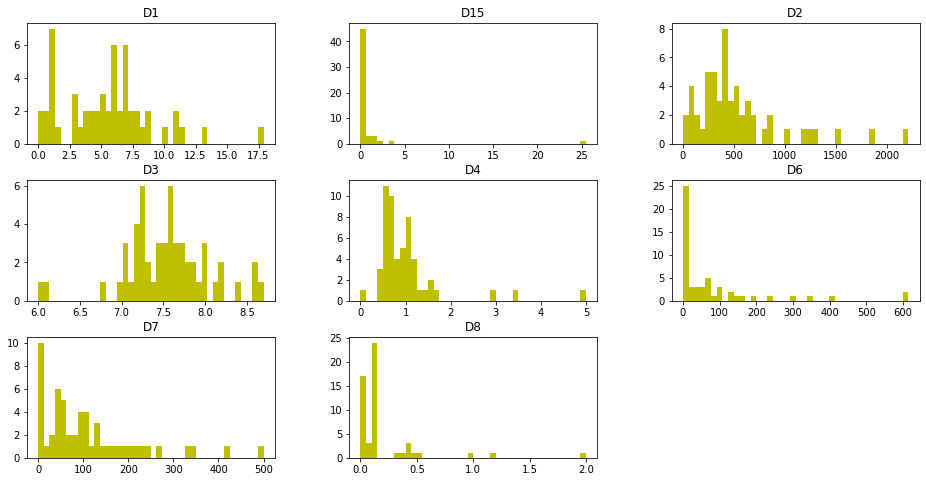

In [369]:
train_df[DUE_D_FEATURES].hist(figsize=(16,8), bins=40, color='y', grid=False)

In [370]:
# Зададим значения нормативных лимитов по признакам D1 - D20:
norm = [7, 1000, 7.5, 5, 0.5,
       350, 500, 1.5, 0.7, 0.5,
       0.03, 0.01, 0.02, 7, 1.5,
        60, 0.002, 0.03, 3.5, 50]

In [371]:
# Определим функцию, которая собирает в списки максимальные и медианные значения признаков
def borders(df_features):
    max_list = []
    median_list = []
    
    for i in range(len(df_features)):
        max_i = train_df[df_features[i]].max()
        max_list.append(max_i)

        median_i = train_df[df_features[i]].median()
        median_list.append(median_i)
    
    return max_list, median_list

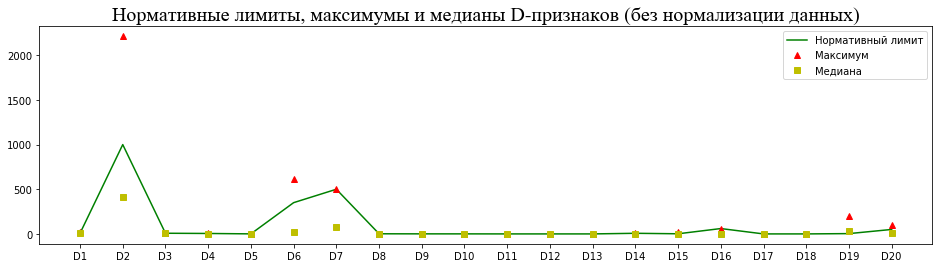

In [372]:
# Получим списки максимальных и медианных значений D-признаков
max_list = borders(D_FEATURES)[0]
median_list = borders(D_FEATURES)[1]

# Построим график 'Нормативные лимиты, максимумы и медианы D-признаков (без нормализации данных)'
index_d = np.arange(20)

fig = plt.figure(figsize = (16, 4))
plt.title('Нормативные лимиты, максимумы и медианы D-признаков (без нормализации данных)',
          fontsize=20, fontname='Times New Roman') 
y1 = norm  # график предельно допустимых концентраций 
y2 = max_list  # график максимумов
y3 = median_list  # график медиан 
plt.plot(y1,'g-',y2,'r^',y3,'ys')

plt.xticks(index_d,D_FEATURES)
plt.legend(['Нормативный лимит','Максимум','Медиана'], loc=1)
plt.show()

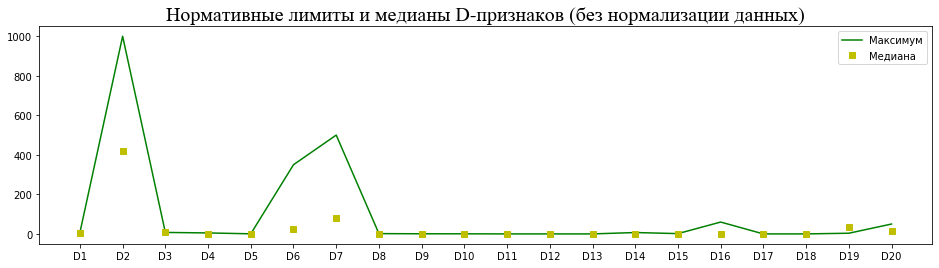

In [373]:
# Построим график 'Нормативные лимиты и медианы D-признаков (без нормализации данных)'
index_d = np.arange(20)

fig = plt.figure(figsize = (16, 4))
plt.title('Нормативные лимиты и медианы D-признаков (без нормализации данных)',
          fontsize=20, fontname='Times New Roman') 
y1 = norm  # график предельно допустимых концентраций 
y3 = median_list  # график медиан 
plt.plot(y1,'g-',y3,'ys')

plt.xticks(index_d,D_FEATURES)
plt.legend(['Максимум','Медиана'], loc=1)
plt.show()

In [374]:
# to do Исключить признаки, в которых максимум меньше ПДК
def best_norm(df_features):
    best_list = []
    
    norm = [7, 1000, 7.5, 5, 0.5,
       350, 500, 1.5, 0.7, 0.5,
       0.03, 0.01, 0.02, 7, 1.5,
        60, 0.002, 0.03, 3.5, 50]
    
    for i in range(len(df_features)):
        max_i = train_df[df_features[i]].max()
        norm_i = norm[i]
        
        if norm_i >= max_i:
            best_list.append(df_features[i])
  
    return best_list

In [375]:
BEST_D_FEATURES = best_norm(D_FEATURES)
BEST_D_FEATURES

['D4', 'D5', 'D7', 'D9', 'D12', 'D16', 'D17', 'D18']

In [376]:
# Создадим группу признаков с интересующими D-показателями 
FOX_D_FEATURES = list(itertools.filterfalse(BEST_D_FEATURES.__contains__, iter(D_FEATURES)))
PH_FEATURES = ['D3']
FOX_D_FEATURES = list(itertools.filterfalse(PH_FEATURES.__contains__, iter(FOX_D_FEATURES)))
FOX_D_FEATURES

['D1', 'D2', 'D6', 'D8', 'D10', 'D11', 'D13', 'D14', 'D15', 'D19', 'D20']

### Нормализация данных

In [377]:
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [378]:
# output
MODELS_PATH = Path('./models/')
MODEL_FILE_PATH = MODELS_PATH / 'model.pkl'

SCALER_FILE_PATH = MODELS_PATH / 'scaler.pkl'

In [379]:
scaler = StandardScaler()

norm_df = train_df.copy()
norm_df[D_FEATURES] = scaler.fit_transform(norm_df[D_FEATURES])

train_df = norm_df.copy()

# Сохранение модели для нормализации данных
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

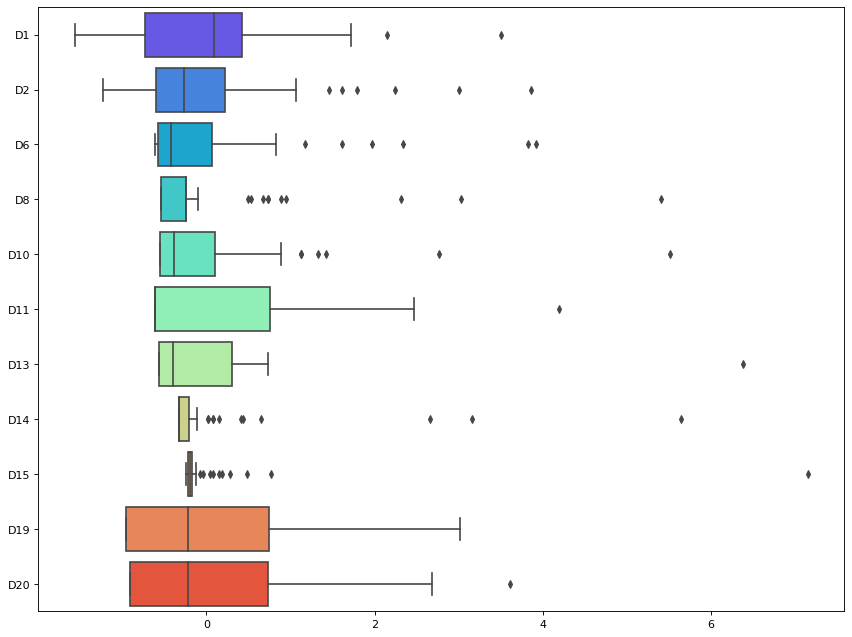

In [380]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(data=train_df[FOX_D_FEATURES], palette='rainbow', orient='h');  # orient='r' для горизонтального представления

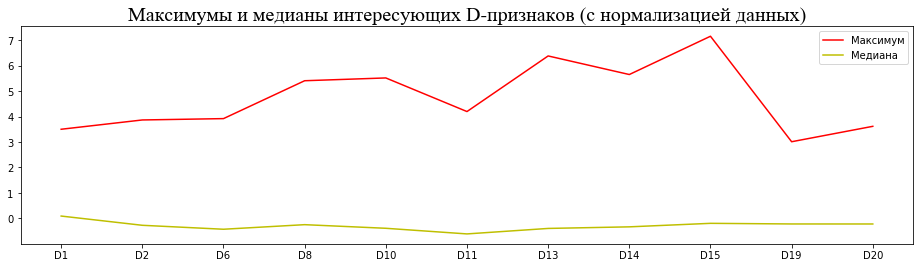

In [381]:
max_norm_list = borders(FOX_D_FEATURES)[0]
median_norm_list = borders(FOX_D_FEATURES)[1]

# Построим график 'Максимумы и медианы интересующих D-признаков (с нормализацией данных)'
index_d = np.arange(len(FOX_D_FEATURES))

fig = plt.figure(figsize = (16, 4))
plt.title('Максимумы и медианы интересующих D-признаков (с нормализацией данных)',
          fontsize=20, fontname='Times New Roman') 
y2 = max_norm_list
y3 = median_norm_list
plt.plot(y2,'r-',y3,'y-')

plt.xticks(index_d,FOX_D_FEATURES)
plt.legend(['Максимум','Медиана'], loc=1)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C688798448>,
      dtype=object)

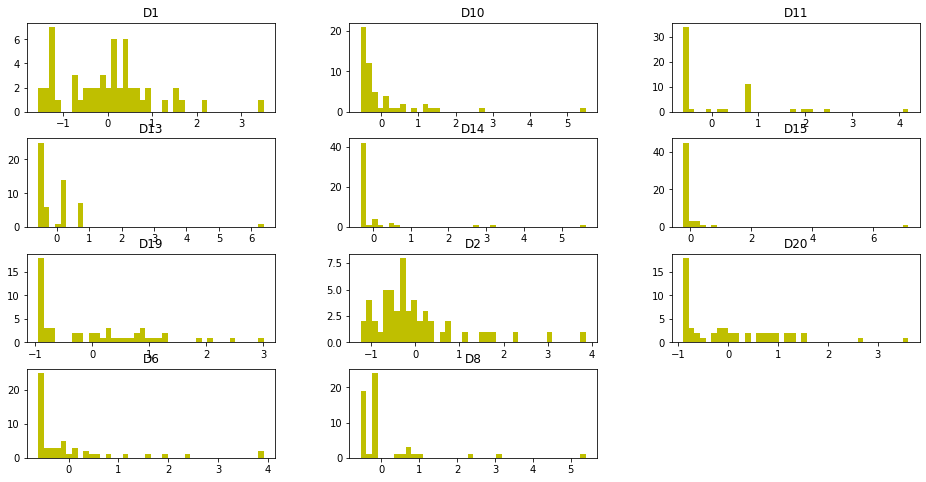

In [382]:
train_df[FOX_D_FEATURES].hist(figsize=(16,8), bins=40, color='y', grid=False)

### Вывод

По итогам проведенного EDA предлагаются следующие дальнейшие шаги:

1. В интересующих D-признаках значения, равные нулю, и пропуски заменить на значения нормативных лимитов.
2. Снова исследовать персентили в интересующих D-признаках.
3. Интересующие D-признаки перевести в категориальные, применив или бинарнное деление "в пределах нормативного лимита / сверх нормативного лимита", или более сложные группировки.
4. Попробовать выполнить кластеризацию на основании интересующих D-признаков.